<h2> PCA and the Iris Dataset </h2>

One of the most famous data sets in statistics is the [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set)*, which is used as a frequent testbed for analyzing machine learning algorithm. The data set contains measurements of four pieces of data from 150 flowers, each belonging to one of three species of iris: *setosa*, *versicolor*, and *virginica*. The measurements of each flower are the lengths and widths of the sepals and petals of the flowers. The dataset was downloaded from the [UC Irvine ML Repository](https://archive.ics.uci.edu/dataset/53/iris).

To run any block of code in this notebook, just put your cursor into the block and click the `run` button above or press `Ctrl+Enter` or `Cmd+Enter`. Markdown cells are text with fancy formatting, and code cells are in Python.

Below, we'll analyze the data. The **goal** of the project is to see if we can differentiate different kinds of flowers from their measurements. PCA will be the key way to differentiate between features!

The data is in the file `iris.data` and the file `iris.names` has the details of what the data in the file represents. My only modification was to add a header row in the data file to include names of the columns.

The required packages for this notebook to run are `pandas`, `numpy`, and `scikit-learn`. A non-interactive pdf is also posted on Canvas if you have issues running any of the cells.

**The dataset was first published by Ronald Fisher who, along with Karl Pearson, are some of the founders of modern statistics. Unfortunately, as was the case with Pearson, Fisher used his statistical knowledge as a avowed eugenicist.*

In [1]:
# Using pandas to set this up!

import pandas
import numpy 

with open('iris.data') as f:
    data_file = pandas.read_csv(f)

iris_df = pandas.DataFrame(data=data_file)
display(iris_df)

,sepal_length,sepal_width,petal_length,petal_width,type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


<Axes: >

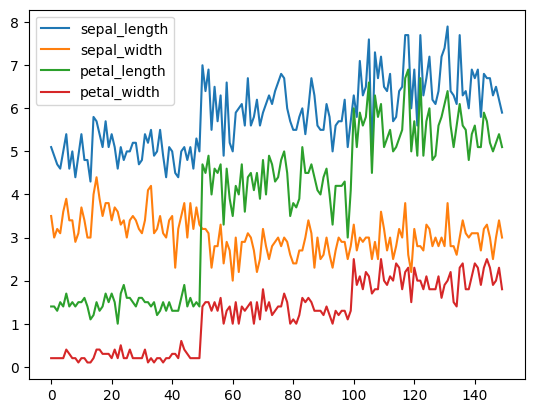

In [2]:
# Now we'd like to start plotting some things:
# Note that this is going to be quite useless!!

iris_df.plot()

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

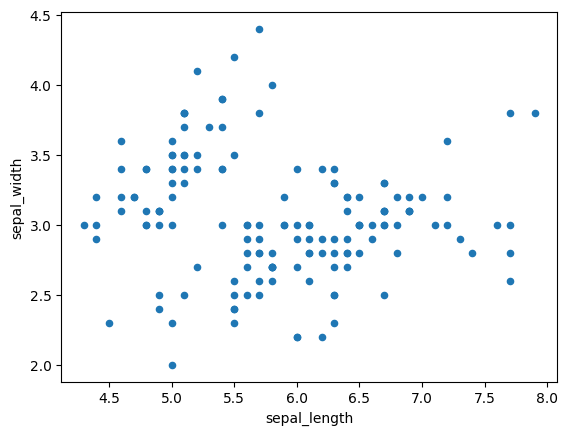

In [3]:
# Now we'd like to start seeing if there are any
# associations between the different data points.

# Let's start with the first two columns:
iris_df.plot.scatter(x='sepal_length',y='sepal_width')

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

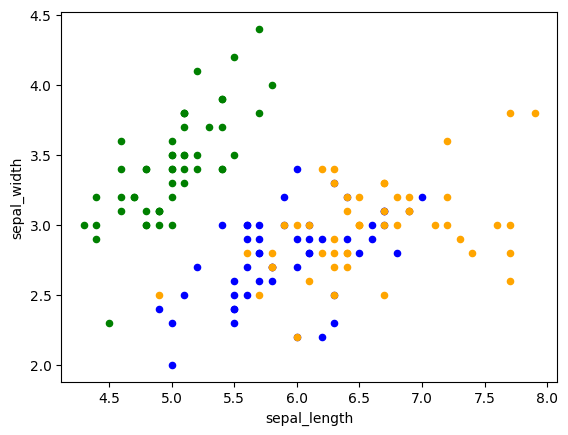

In [4]:
# So it seems like there might be some positive correlation
# between sepal_width and sepal_length... which isn't super
# surprising. But what we really want to do is to try to
# differentiate between the flowers. Let's split the 
# data frame:

setosa_df = iris_df[iris_df['type']=='Iris-setosa']
versicolor_df = iris_df[iris_df['type']=='Iris-versicolor']
virginica_df = iris_df[iris_df['type']=='Iris-virginica']

ax1 = setosa_df.plot.scatter(x='sepal_length', 
                             y='sepal_width',
                            color='green')
versicolor_df.plot.scatter(x='sepal_length', 
                           y='sepal_width', 
                           color='blue',
                           ax=ax1)
virginica_df.plot.scatter(x='sepal_length', 
                          y='sepal_width',
                         color='orange',
                         ax=ax1)

Now we're really getting somewhere! It's pretty clear that the setosa irises are quantitatively different from the other two species based on the sepals, but the versicolor and virginica are impossible to differentiate this way.

On the other hand, the blue and orange data sets are still not at all differentiated... We could try going through all the different combinations of variables to see which pair has the strongest differentiation.

Or we can use PCA, which tries to explain the variance as much as possible.

In [5]:
from sklearn.decomposition import PCA

# Start by normalizing the data frame. Isolate the numerical
# features, then get rid of the mean and standard deviation:
features = iris_df[['sepal_length', 
                    'sepal_width', 
                    'petal_length', 
                    'petal_width']]
features = (features - features.mean()) / features.std()

# Now run the principal component analysis; we're going to
# be taking the top two singular values. Let's start by taking
# the SVD and seeing what they are:

U,S,V = numpy.linalg.svd(features)
print(S)

[20.82575075 11.71588318  4.68568442  1.75229803]


So the singular values are about 20.8, 11.7, 4.7, and 1.8. There's a pretty rapid dropoff after the first two, suggesting that just the first two singular values are going to be pretty predictive. Let's now actually run the PCA taking two components and see what happens!

In [6]:
# Time to run the PCA!

pca = PCA(n_components=2)
pca.fit(features)

# There's a built-in package to compute the
# explained variance ratio:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.72770452 0.23030523]
0.9580097536148198


This means that the first principal component explains $73\%$ of the variance and the second explains $23\%$, which is almost all fo the remaining! With only two features (i.e. a $50\%$ reduction in the data from the original), we have captured $96\%$ of the original variance. This is amazing for feature identification and data compression!

Finally, let's plot the features:

<Axes: xlabel='first', ylabel='second'>

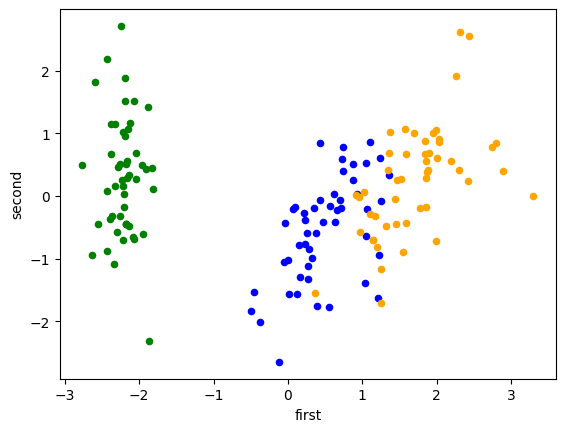

In [7]:
# This makes a new pandas DataFrame from the transformed
# version after taking PCA with the top two components.
df_pca = pandas.DataFrame(pca.transform(features), 
                          columns = ['first', 'second'])

# Now we need to relabel the data to include the species:
df_pca_type = df_pca.assign(type=iris_df['type'])

# At long last, let's plot! And yes, there are better
# ways to do this, but this is easy to copy-paste:

setosa_pca_df = df_pca_type[df_pca_type['type']=='Iris-setosa']
versicolor_pca_df = df_pca_type[df_pca_type['type']=='Iris-versicolor']
virginica_pca_df = df_pca_type[df_pca_type['type']=='Iris-virginica']

# And the plot:
ax1 = setosa_pca_df.plot.scatter(x='first',
                             y='second',
                            color='green')
versicolor_pca_df.plot.scatter(x='first',
                             y='second',
                            color='blue',
                            ax=ax1)
virginica_pca_df.plot.scatter(x='first',
                             y='second',
                            color='orange',
                            ax=ax1)

Great! We have a very strong differentiation between the green data set and the other two. There is still some overlap between the blue and the orange, but again they are *reasonably* well differentiated. We can't draw a line to separate the two of them, but the vast majority of the blue mass is kept separate from the vast majority of the yellow mass. And we did this after throwing away a lot of the data!